In [2]:
!pip install -U bitsandbytes

All packages loaded correctly!

GPU Information:
GPU: Tesla T4
VRAM: 14.74 GB

Login to Hugging Face:
Get your token from: https://huggingface.co/settings/tokens



Configuration:
Model: stabilityai/stable-diffusion-xl-base-1.0
Dataset: lambdalabs/naruto-blip-captions
Resolution: 768x768
Training steps: 3000
LoRA Rank: 16
Noise Offset: 0.1
Random Crop: True
Output: /kaggle/working/naruto

Loading Naruto dataset from Hugging Face...


Repo card metadata block was not found. Setting CardData to empty.


Loaded 1221 images

Sample caption: a man with dark hair and brown eyes


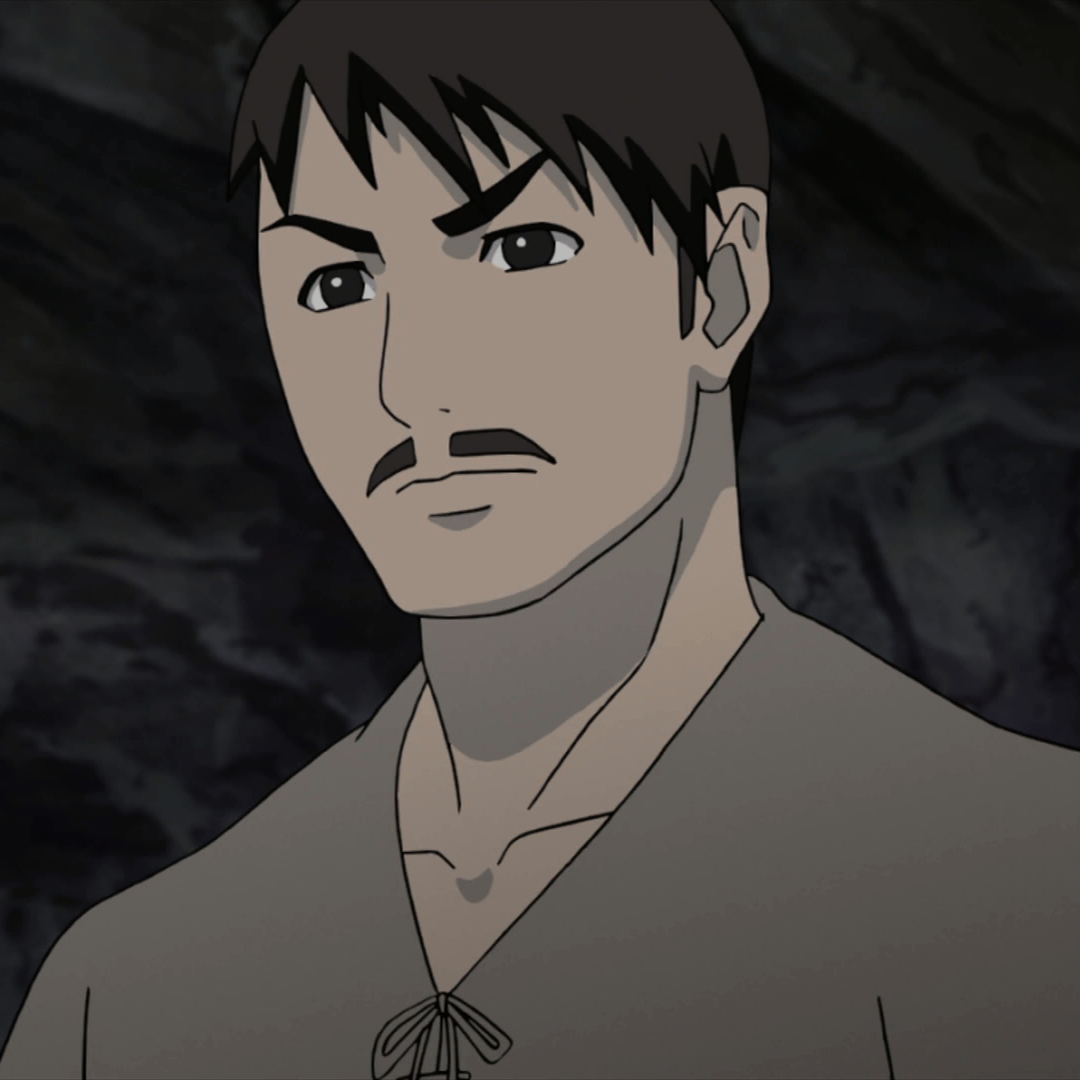

Dataset ready: 1221 images at 768x768

Loading SDXL models (this takes 3-5 minutes)...


2025-11-29 05:49:33.818226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764395373.857424     295 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764395373.868257     295 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Loading VAE in float32 for stability...
Loading text encoders in float16 (will be FROZEN for memory efficiency)...
The Models loaded
Text encoders FROZEN - saving ~2-3GB VRAM

Adding LoRA layers to UNet ONLY...
trainable params: 28,825,600 || all params: 2,596,289,284 || trainable%: 1.1103

Enabling memory optimizations...
Using PyTorch native scaled_dot_product_attention (optimized for T4)
Gradient checkpointing enabled
VAE slicing and tiling enabled

Setting up training...
DataLoader ready: 1221 batches per epoch
Training for 3000 steps (~2.5 hours)

Starting training...



  0%|          | 0/3000 [00:00<?, ?it/s]

Step 2/3000 | Loss: 0.0773 | LR: 0.00e+00
Step 4/3000 | Loss: 0.1183 | LR: 1.00e-06
Step 6/3000 | Loss: 0.0983 | LR: 1.00e-06
Step 8/3000 | Loss: 0.1366 | LR: 2.00e-06
Step 10/3000 | Loss: 0.1312 | LR: 2.00e-06
Step 12/3000 | Loss: 0.1207 | LR: 3.00e-06
Step 14/3000 | Loss: 0.1233 | LR: 3.00e-06
Step 16/3000 | Loss: 0.1280 | LR: 4.00e-06
Step 18/3000 | Loss: 0.1237 | LR: 4.00e-06
Step 20/3000 | Loss: 0.1247 | LR: 5.00e-06
Step 22/3000 | Loss: 0.1304 | LR: 5.00e-06
Step 24/3000 | Loss: 0.1269 | LR: 6.00e-06
Step 26/3000 | Loss: 0.1201 | LR: 6.00e-06
Step 28/3000 | Loss: 0.1208 | LR: 7.00e-06
Step 30/3000 | Loss: 0.1140 | LR: 7.00e-06
Step 32/3000 | Loss: 0.1182 | LR: 8.00e-06
Step 34/3000 | Loss: 0.1188 | LR: 8.00e-06
Step 36/3000 | Loss: 0.1211 | LR: 9.00e-06
Step 38/3000 | Loss: 0.1186 | LR: 9.00e-06
Step 40/3000 | Loss: 0.1153 | LR: 1.00e-05
Step 42/3000 | Loss: 0.1136 | LR: 1.00e-05
Step 44/3000 | Loss: 0.1113 | LR: 1.10e-05
Step 46/3000 | Loss: 0.1068 | LR: 1.10e-05
Step 48/3000 | 

KeyboardInterrupt: 

In [ ]:
-
import sys
import os
import torch

print("All packages loaded correctly!\n")



print("GPU Information:")
print(f"GPU: {torch.cuda.get_device_name(0)}")
print(f"VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

# Login to Hugging Face (required for dataset access)
print("\nLogin to Hugging Face:")
print("Get your token from: https://huggingface.co/settings/tokens")
from huggingface_hub import notebook_login
notebook_login()


print("\nConfiguration:")

# Model settings
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATASET_NAME = "lambdalabs/naruto-blip-captions"
OUTPUT_DIR = "/kaggle/working/naruto"

# Training settings 
RESOLUTION = 768          
BATCH_SIZE = 1            
GRADIENT_ACCUMULATION = 4 
LEARNING_RATE = 1e-4
MAX_TRAIN_STEPS = 3000    
SAVE_STEPS = 500          

# LoRA settings
LORA_RANK = 16            
LORA_ALPHA = 16           
LORA_DROPOUT = 0.0        # 0.0 for stable training

# Advanced settings 
NOISE_OFFSET = 0.1        # Helps with very dark/bright images (0.0 to disable)
USE_RANDOM_CROP = True    # Random crop (True) vs center crop (False)




print(f"Model: {MODEL_NAME}")
print(f"Dataset: {DATASET_NAME}")
print(f"Resolution: {RESOLUTION}x{RESOLUTION}")
print(f"Training steps: {MAX_TRAIN_STEPS}")
print(f"LoRA Rank: {LORA_RANK}")
print(f"Noise Offset: {NOISE_OFFSET}")
print(f"Random Crop: {USE_RANDOM_CROP}")
print(f"Output: {OUTPUT_DIR}\n")

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save config for reference
config = {
    "model": MODEL_NAME,
    "dataset": DATASET_NAME,
    "resolution": RESOLUTION,
    "batch_size": BATCH_SIZE,
    "gradient_accumulation": GRADIENT_ACCUMULATION,
    "learning_rate": LEARNING_RATE,
    "max_train_steps": MAX_TRAIN_STEPS,
    "lora_rank": LORA_RANK,
    "lora_alpha": LORA_ALPHA,
    "noise_offset": NOISE_OFFSET,
}

import json
with open(f"{OUTPUT_DIR}/training_config.json", "w") as f:
    json.dump(config, f, indent=2)


print("Loading Naruto dataset from Hugging Face...")
from datasets import load_dataset
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.transforms.functional import crop
from PIL import Image

# Load dataset
dataset = load_dataset(DATASET_NAME, split="train")
print(f"Loaded {len(dataset)} images")

# Preview first sample
print(f"\nSample caption: {dataset[0]['text']}")
display(dataset[0]['image'])


class NarutoSDXLDataset(Dataset):
    def __init__(self, hf_dataset, resolution=768, random_crop=True):
        self.dataset = hf_dataset
        self.resolution = resolution
        self.random_crop = random_crop

        # Basic transforms
        self.resize = transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR)
        self.to_tensor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ])

        # Crop transforms
        self.center_crop = transforms.CenterCrop(resolution)
        self.random_crop_fn = transforms.RandomCrop(resolution)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        caption = item['text']

       
        original_size = (image.height, image.width)

        
        image = self.resize(image)

        
        if self.random_crop:
            # Get random crop parameters
            i, j, h, w = self.random_crop_fn.get_params(
                image, (self.resolution, self.resolution)
            )
            image = crop(image, i, j, h, w)
            crop_top_left = (i, j)
        else:
            # Center crop
            i = max(0, int(round((image.height - self.resolution) / 2.0)))
            j = max(0, int(round((image.width - self.resolution) / 2.0)))
            image = self.center_crop(image)
            crop_top_left = (i, j)

        # Convert to tensor
        image = self.to_tensor(image)

        # Add trigger word
        caption = f"naruto style, {caption}"

        return {
            "pixel_values": image,
            "caption": caption,
            "original_size": original_size,      # NEW: For time_ids
            "crop_top_left": crop_top_left,      # NEW: For time_ids
        }

# Create dataset
train_dataset = NarutoSDXLDataset(dataset, resolution=RESOLUTION, random_crop=USE_RANDOM_CROP)
print(f"Dataset ready: {len(train_dataset)} images at {RESOLUTION}x{RESOLUTION}\n")

# ---------------- SECTION 5: LOAD SDXL MODELS ----------------
print("Loading SDXL models (this takes 3-5 minutes)...")
from diffusers import AutoencoderKL, DDPMScheduler, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTextModelWithProjection, CLIPTokenizer
from peft import LoraConfig, get_peft_model

# Enable memory optimizations
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

# Load tokenizers
tokenizer_one = CLIPTokenizer.from_pretrained(MODEL_NAME, subfolder="tokenizer")
tokenizer_two = CLIPTokenizer.from_pretrained(MODEL_NAME, subfolder="tokenizer_2")


print("Loading VAE in float32 for stability...")
vae = AutoencoderKL.from_pretrained(
    MODEL_NAME, subfolder="vae", torch_dtype=torch.float32  # ← FLOAT32!
)

print("Loading text encoders in float16 (will be FROZEN for memory efficiency)...")
text_encoder_one = CLIPTextModel.from_pretrained(
    MODEL_NAME,
    subfolder="text_encoder",
    torch_dtype=torch.float16,  # Float16 for efficiency
)

text_encoder_two = CLIPTextModelWithProjection.from_pretrained(
    MODEL_NAME,
    subfolder="text_encoder_2",
    torch_dtype=torch.float16,  # Float16 for efficiency
)

# Load UNet in float16
unet = UNet2DConditionModel.from_pretrained(
    MODEL_NAME, subfolder="unet", torch_dtype=torch.float16
)

print("The Models loaded")

vae.requires_grad_(False)
text_encoder_one.requires_grad_(False)  # ← NOW FROZEN!
text_encoder_two.requires_grad_(False)  # ← NOW FROZEN!

print("Text encoders FROZEN - saving ~2-3GB VRAM")

print("\nAdding LoRA layers to UNet ONLY...")
target_modules_for_unet=[
    # Self-attention
    "to_q", "to_k", "to_v", "to_out.0",
    # Cross-attention (CRITICAL FOR SDXL!)
    "add_k_proj", "add_q_proj", "add_v_proj",
    # Convolutions (for style)
    "conv1", "conv2", "conv_shortcut",
]
lora_config_2 = LoraConfig(
    r=LORA_RANK,
    lora_alpha=LORA_ALPHA,
    init_lora_weights="gaussian",
    target_modules=target_modules_for_unet,
    lora_dropout=LORA_DROPOUT,
)

unet = get_peft_model(unet, lora_config_2)
unet.print_trainable_parameters()


device = "cuda:0"
vae.to(device)  # VAE stays in float32
text_encoder_one.to(device)
text_encoder_two.to(device)
unet.to(device)


print("\nEnabling memory optimizations...")


from diffusers.models.attention_processor import AttnProcessor2_0
unet.set_attn_processor(AttnProcessor2_0())

unet.enable_gradient_checkpointing()
vae.enable_slicing()
vae.enable_tiling()

print("Using PyTorch native scaled_dot_product_attention (optimized for T4)")
print("Gradient checkpointing enabled")
print("VAE slicing and tiling enabled\n")


print("Setting up training...")
from torch.utils.data import DataLoader
from diffusers.optimization import get_cosine_schedule_with_warmup
import torch.nn.functional as F

# Create dataloader
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

# Tokenization function
def tokenize_captions(captions):
    inputs_one = tokenizer_one(
        captions, padding="max_length", max_length=tokenizer_one.model_max_length,
        truncation=True, return_tensors="pt"
    )
    inputs_two = tokenizer_two(
        captions, padding="max_length", max_length=tokenizer_two.model_max_length,
        truncation=True, return_tensors="pt"
    )
    return inputs_one.input_ids, inputs_two.input_ids


def compute_time_ids(original_size, crop_coords_top_left, target_size=(768, 768)):
    """
    Compute SDXL time embeddings.
    Format: [original_height, original_width, crop_top, crop_left, target_height, target_width]
    """
    add_time_ids = list(original_size + crop_coords_top_left + target_size)
    add_time_ids = torch.tensor([add_time_ids], dtype=torch.float16)
    return add_time_ids

params_to_optimize = list(unet.parameters())

optimizer = torch.optim.AdamW(
    params_to_optimize,
    lr=LEARNING_RATE,
    betas=(0.9, 0.999),
    weight_decay=1e-2,
    eps=1e-8,
)

# Scheduler
lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=100,
    num_training_steps=MAX_TRAIN_STEPS,
)

# Noise scheduler
noise_scheduler = DDPMScheduler.from_pretrained(MODEL_NAME, subfolder="scheduler")

print(f"DataLoader ready: {len(train_dataloader)} batches per epoch")
print(f"Training for {MAX_TRAIN_STEPS} steps (~{MAX_TRAIN_STEPS * 3 / 3600:.1f} hours)\n")


print("Starting training...\n")
from tqdm.auto import tqdm
import gc

# Initialize
start_step = 0


progress_bar = tqdm(range(start_step, MAX_TRAIN_STEPS), initial=start_step, total=MAX_TRAIN_STEPS)
global_step = start_step
losses = []
lr_list=[]
unet.train()

text_encoder_one.eval()
text_encoder_two.eval()

torch.cuda.empty_cache()
gc.collect()

try:
    for epoch in range(100):  # Will stop at MAX_TRAIN_STEPS
        for batch in train_dataloader:
            try:
                # Get batch data
                pixel_values = batch["pixel_values"].to(device)
                captions = batch["caption"]

                # VAE encoding (always with no_grad - VAE is frozen)
                with torch.no_grad():
                    latents = vae.encode(pixel_values).latent_dist.sample()
                    latents = latents * vae.config.scaling_factor

                # Convert latents to float16 for UNet
                latents = latents.to(dtype=torch.float16)

                
                with torch.no_grad():  
                    input_ids_one, input_ids_two = tokenize_captions(captions)

                    # Encode with both text encoders
                    enc_one = text_encoder_one(input_ids_one.to(device), output_hidden_states=True)
                    enc_two = text_encoder_two(input_ids_two.to(device), output_hidden_states=True)

                    # SDXL concatenates encoders
                    pooled_prompt_embeds = enc_two[0]
                    encoder_hidden_states = torch.cat([
                        enc_one.hidden_states[-2],
                        enc_two.hidden_states[-2]
                    ], dim=-1)

                # Sample noise
                noise = torch.randn_like(latents)

                # Add noise offset for better dark/bright image handling
                if NOISE_OFFSET > 0:
                    noise += NOISE_OFFSET * torch.randn(
                        (latents.shape[0], latents.shape[1], 1, 1),
                        device=device,
                        dtype=torch.float16
                    )

                bsz = latents.shape[0]
                timesteps = torch.randint(
                    0, noise_scheduler.config.num_train_timesteps, (bsz,), device=device
                ).long()

                # Add noise
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Compute proper time_ids for SDXL
                add_time_ids = torch.cat([
                    compute_time_ids(
                        (batch["original_size"][0][j].item(), batch["original_size"][1][j].item()),
                        (batch["crop_top_left"][0][j].item(), batch["crop_top_left"][1][j].item()),
                        (RESOLUTION, RESOLUTION)
                    ).to(device)
                    for j in range(bsz)
                ])

                # Predict noise with UNet 
                model_pred = unet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states,
                    added_cond_kwargs={
                        "text_embeds": pooled_prompt_embeds,
                        "time_ids": add_time_ids
                    }
                ).sample

                # Calculate loss
                target = noise
                loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                # Scale loss for gradient accumulation
                loss = loss / GRADIENT_ACCUMULATION

                # Backward pass
                loss.backward()

                # Update weights after accumulation steps
                if (global_step + 1) % GRADIENT_ACCUMULATION == 0:
                    torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
                    optimizer.step()
                    lr_scheduler.step()
                    optimizer.zero_grad()

                # Logging
                losses.append(loss.item() * GRADIENT_ACCUMULATION)
                lr = lr_scheduler.get_last_lr()[0]
                lr_list.append(lr)
                progress_bar.update(1)
                global_step += 1

                # Print progress
                if global_step % 2 == 0:
                    avg_loss = sum(losses[-50:]) / len(losses[-50:])
                    lr = lr_scheduler.get_last_lr()[0]
                    print(f"Step {global_step}/{MAX_TRAIN_STEPS} | Loss: {avg_loss:.4f} | LR: {lr:.2e}")

                # Save checkpoint
                if global_step % 50 == 0 and global_step > 0:
                    checkpoint_dir = f"{OUTPUT_DIR}/checkpoint-{global_step}-i"
                    os.makedirs(checkpoint_dir, exist_ok=True)

                    
                    unet.save_pretrained(checkpoint_dir)
                    
                    # Save training state info
                    state_info = {
                        "step": global_step,
                        "epoch": epoch,
                        "loss": avg_loss,
                        "lr": lr,
                    }
                    with open(f"{checkpoint_dir}/training_state.json", "w") as f:
                        json.dump(state_info, f, indent=2)

                    print(f"CHECKPOINT SAVED → {checkpoint_dir}")
                    torch.cuda.empty_cache()
                    gc.collect()

                if global_step >= MAX_TRAIN_STEPS:
                    break

            except RuntimeError as e:
                if "out of memory" in str(e):
                    print(f"\nOOM ERROR at step {global_step}!")
                    print(f"Last checkpoint: {OUTPUT_DIR}/checkpoint-{(global_step // SAVE_STEPS) * SAVE_STEPS}")
                    raise e
                else:
                    raise e

        if global_step >= MAX_TRAIN_STEPS:
            break

except KeyboardInterrupt:
    print(f"\nTraining interrupted at step {global_step}")

print(f"\nTraining complete! Final step: {global_step}")

# ---------------- SECTION 8: SAVE FINAL MODEL ----------------
print("\nSaving final LoRA weights...")
os.makedirs(f"{OUTPUT_DIR}/final", exist_ok=True)

unet.save_pretrained(f"{OUTPUT_DIR}/final")

# Save final training info
final_info = {
    "total_steps": global_step,
    "final_loss": losses[-1] if losses else 0,
    "config": config,
}
with open(f"{OUTPUT_DIR}/final_training_info.json", "w") as f:
    json.dump(final_info, f, indent=2)

print(f"Saved to: {OUTPUT_DIR}/final")
print(f"Safetensors: {OUTPUT_DIR}/naruto_sdxl_lora.safetensors")

# Plot loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss (Frozen Text Encoders)')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig(f"{OUTPUT_DIR}/loss_curve.png")
plt.show()

# Download files
print("\nDownloading files...")
from google.colab import files
!zip -r /content/naruto_sdxl_lora.zip {OUTPUT_DIR}
files.download('/content/naruto_sdxl_lora.zip')

# Clear memory
torch.cuda.empty_cache()
gc.collect()

print("\n" + "="*70)
print("✅ TRAINING COMPLETE WITH FROZEN TEXT ENCODERS")
print("="*70)
print("Benefits of frozen approach:")
print("  • ~2-3GB less VRAM usage")
print("  • Faster training (~40% speed increase)")
print("  • Better generalization to new prompts")
print("  • More stable training on T4 GPUs")
print("="*70)

In [ ]:
#inference here

2025-11-29 06:40:43.669891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764398443.701659     513 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764398443.709605     513 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Loading SDXL base models...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading LoRA weights...
All LoRA loaded!


  0%|          | 0/30 [00:00<?, ?it/s]

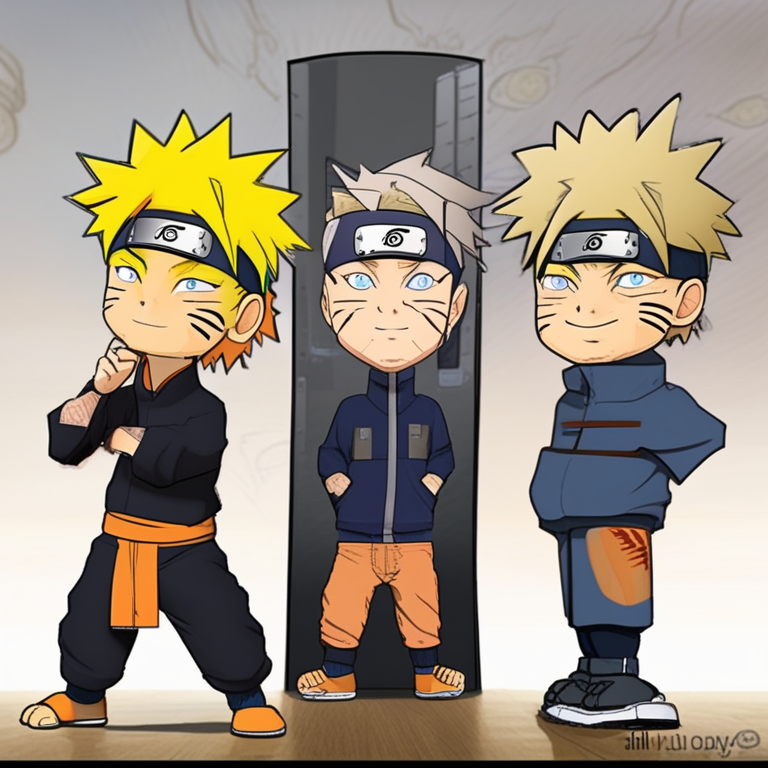

Done!


In [ ]:


import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler
from transformers import CLIPTextModel, CLIPTextModelWithProjection
from peft import PeftModel

MODEL_ID = "stabilityai/stable-diffusion-xl-base-1.0"
LORA_PATH = "/kaggle/working/naruto/checkpoint-400-i"

print("Loading SDXL base models...")

pipe = StableDiffusionXLPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda:1")

print("Loading LoRA weights...")

# Load UNet LoRA
pipe.unet = PeftModel.from_pretrained(pipe.unet, LORA_PATH)
pipe.unet = pipe.unet.merge_and_unload()


# Optimizations
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_vae_slicing()

print("All LoRA loaded!")

prompt = "naruto style, bill gates"

image = pipe(
    prompt=prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

display(image)
print("Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

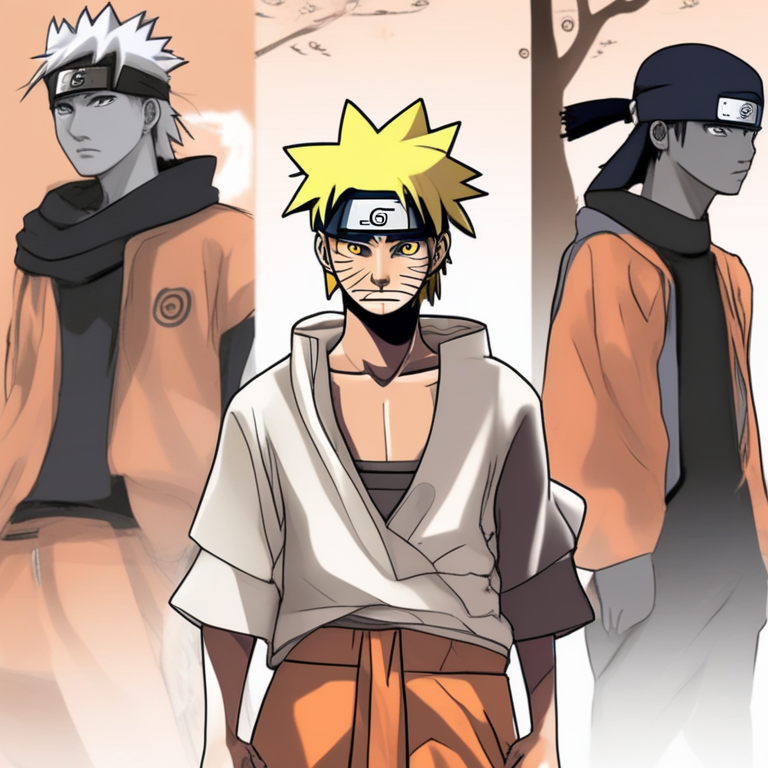

Done!


In [ ]:
prompt = "naruto style, indian boy"

image = pipe(
    prompt=prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("Done!")